# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


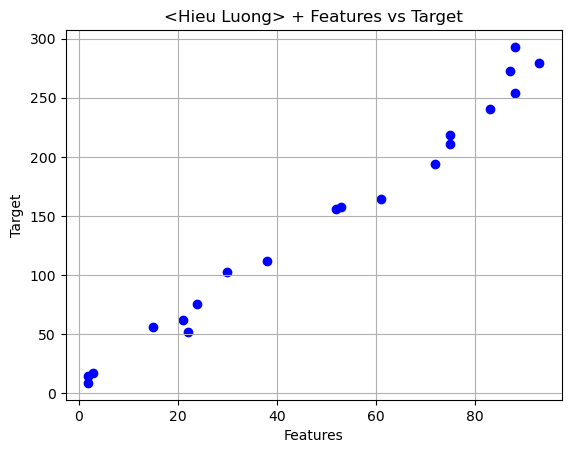

In [8]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data
%matplotlib inline

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
plt.scatter(X,y, color ='blue', label='Actual')
plt.title('<Hieu Luong> + Features vs Target')
plt.xlabel('Features')
plt.ylabel('Target')

plt.grid(True)
plt.show()
# Your code


#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [8]:
# Your code for linear regression model

# Sklearn model
from sklearn import linear_model
np.random.seed(30)

X_train =np.random.randint(1, 150,30).reshape(-1,1)
y_train= np.random.randint(1,180,30)

# Prepare data
model = linear_model.LinearRegression()

model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

# Building the Model

# Review Model parameter 

84.44987330799493
[0.20289058]


In [10]:
# Your code for linear regression model

# Manually write cost function & gradient descent 

# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
# your code
X = np.column_stack((np.ones(X.shape[0]),X))
# Define the cost function for linear regression
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    """
    m = len(y)
    predict = X @ theta
    errors = predict - y
    cost = (1/(2 *m)) * np.sum(errors **2)

    return cost
    
   

# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    
    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples

    

    # Iterate to update theta with iterations
    for i in range(iterations):
        t0 = theta[0] - (alpha /m) * np.sum(np.dot(X, theta)-y)

        t1 = theta[1] - (alpha/m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0,t1])
    # your code 
    

    return theta
    


# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(X,y, alpha, iterations)

# Compute the cost using the optimized parameters
cost = compute_cost(X,y,theta)

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

Optimized theta (parameters): [10.38654414  0.93144562]
Final cost: 2368.8756165794607


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

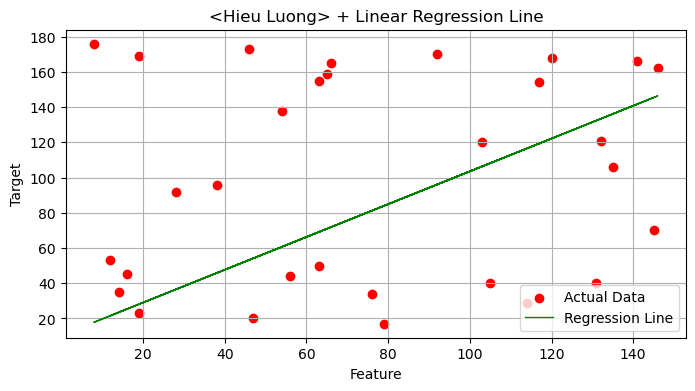

In [18]:
# Compare predictions with actual values
y_pre = np.dot(X, theta)


# Plot the data and regression line
plt.figure(figsize=(8,4))
plt.scatter(X[:,1], y, color='red', label = "Actual Data")
plt.plot(X[:,1], y_pre, color='green', linewidth = 1, label="Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("<Hieu Luong> + Linear Regression Line")
plt.grid(True)
plt.show()

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [59]:
import pandas as pd
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv("Study_hour_Data.csv")
data.head(15)

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X = data[['Hours of Study']].value #use column Hours of Study
y =  data['Passed'].value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000


#### **Section 2: Visualize the data**

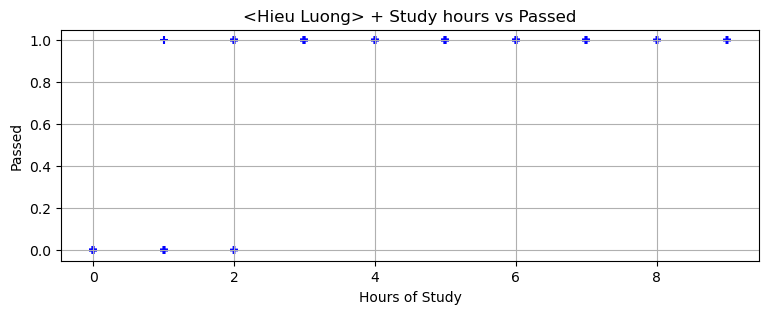

In [45]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title



# Your code: 
plt.figure(figsize=(9,3))
plt.scatter(X, y, color='blue', marker='+')
plt.xlabel("Hours of Study")
plt.ylabel("Passed")
plt.title('<Hieu Luong> + Study hours vs Passed')
plt.grid(True)

plt.show()


#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [61]:
# Your code for logistic regression model

# Sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = data[['Hours of Study']].values #use column Hours of Study
y =  data['Passed'].values 

X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8)

model =LogisticRegression()
model.fit(X_train, y_train)

print("Model Coefficient:", model.coef_[0][0])




# Prepare data


# Building the Model

# Review Model parameter 

Model Coefficient: 2.7181051181774083


In [53]:
# Your logistic regression model

# Define the sigmoid function
def sigmoid(z):
    return 1/(1+ np.exp(-z))
    
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    m =len(y)
    h= sigmoid(X.dot(theta))
    cost = -(1/m) *(y.dot(np.log(h)) +(1-y).dot(np.log(1-h)))
    return cost   

# Define the gradient function
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(h-y)
    
    

In [65]:

# Train your model
from scipy.optimize import minimize


def train(X,y):
    #Reshape X to include a bias term intercept
    X= np.column_stack((np.ones(len(X)),X))

    theta = np.zeros(X.shape[1])

    result = minimize(fun=cost_function, x0=theta, args=(X, y), method='TNC', jac=gradient, options = {'maxfun': 4000})
# Add a bias term (intercept) to X 
    return result.x
    
# Initialize theta (parameters) to zeros

optimal_theta = train(X_train, y_train)

# Minimize the cost function using scipy.optimize


# Print the optimized parameters (theta)
print("Optimized theta (parameters):", optimal_theta)

Optimized theta (parameters): [-9.50575918  5.13806219]


/var/folders/03/c7zh9p9543d9km4rg4w30lv00000gn/T/ipykernel_31439/475301067.py:13: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) *(y.dot(np.log(h)) +(1-y).dot(np.log(1-h)))


#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [66]:
# Predict function
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= 0.5).astype(int)
    # your code
    

# Make predictions
X_test_A = np.column_stack((np.ones(len(X_test)),X_test))
predictions = predict(X_test_A, optimal_theta)
predictions

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [67]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test) *100
print("Accuracy:", accuracy, "%")

Accuracy: 90.0 %


### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

Text(0, 0.5, 'Passed')

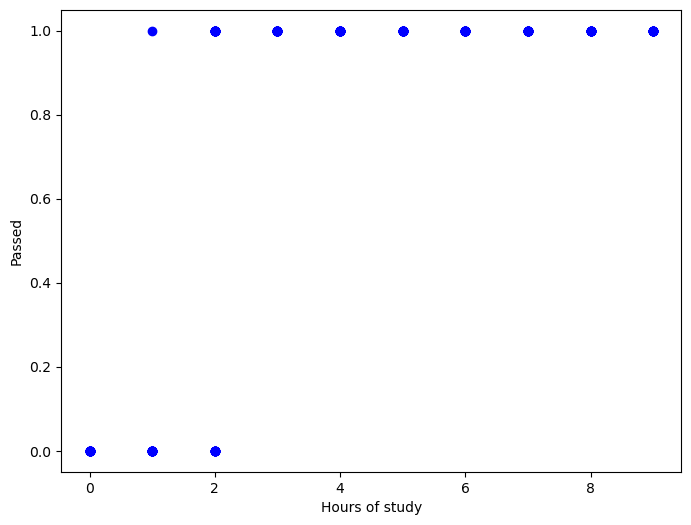

In [68]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title
plt.figure(figsize=(8,6))
plt.scatter(X,y, color = 'blue', label='Actual Data')
X_values = np.linspace(X.min(), X.max(),100)
X_values_bias = np.column_stack((np.ones(len(X_values)), X_values))
dec = sigmoid(X_values_bias.dot(optimal_theta))
plt.plot(X_values, dec, color = 'red',label='Regression Line'0




plt.xlabel("Hours of study")
plt.ylabel("Passed")
plt.title('<Hieu Luong> + Logistic Regression: Hours of Study vs  Passed')
plt.legend()
plt.grid()
plt.show()
